# 1. Check Dependencies are Installed in our venv

In [ ]:
!pip list #check list of Dependencies

# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list #check list agin

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipyker

In [3]:
import tensorflow as tf #import tensorflow as tf
import os #import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpuList = tf.config.experimental.list_physical_devices('GPU') # get all of physical GPU devices allowcated for tensaflow
for gpu in gpuList: 
    tf.config.experimental.set_memory_growth(gpu, True) # limit the GPU memory growth getting one by one from gpu List

In [5]:
tf.config.list_physical_devices('GPU') #check physical GPU devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Delete any questionable photos.

In [6]:
import cv2
import imghdr

In [7]:
data_directory = '..\data' #give path of data directory

In [8]:
image_types = ['jpeg','jpg', 'bmp', 'png'] #store extentions of exist data types

In [9]:
for image_class in os.listdir(data_directory): #get list of directories inside the data directory ex:-['happy','sad']
    for image in os.listdir(os.path.join(data_directory, image_class)):#get every single image from data sub directories -> '../data/happy' -> 465464.png
        image_path = os.path.join(data_directory, image_class, image)#create a new path for image inside of data sub directory 
        try: 
            img = cv2.imread(image_path)#loads an image from the specified file
            tip = imghdr.what(image_path)
            if tip not in image_types: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)# os will remove image from listed image path in here
        except Exception as e: 
            print('Issue with image {}'.format(image_path))# if got an error exception will print it is as an issue

# 3. Load Data

In [10]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_directory) #Generates a tf.data.Dataset from image files in a directory.

Found 4 files belonging to 3 classes.


In [12]:
data_iterator = data.as_numpy_iterator() #image_dataset_from_directory returns a Dataset object and get it as an as_numpy_iterator

In [13]:
batch = data_iterator.next() #To get the next batch, and the next image

In [14]:
batch[0].shape

(4, 256, 256, 3)

In [15]:
# Class 0 - ANGRY
# Class 1 - HAPPY
# Class 2 - SAD
batch[1]

array([1, 0, 1, 2])

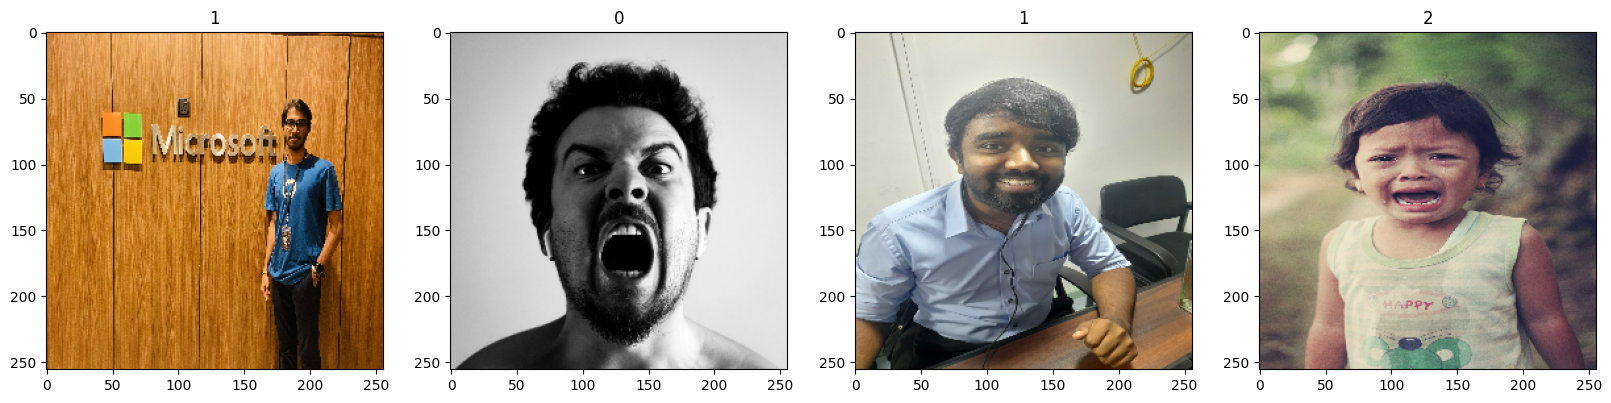

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # create common layouts of subplots, including the enclosing figure object, in a single call.
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))#do visualization in here
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))#each element of this dataset, and returns a new dataset containing the transformed elements (adding 1 to each element, or projecting a subset of element components)

In [18]:
data.as_numpy_iterator().next() #To get the next batch, and the next image

(array([[[[7.93979764e-01, 5.11626840e-01, 2.29273900e-01],
          [8.20955873e-01, 5.50367653e-01, 2.86642164e-01],
          [7.75459588e-01, 5.04871309e-01, 2.03890935e-01],
          ...,
          [5.67279398e-01, 3.12377453e-01, 4.57107835e-02],
          [5.88832736e-01, 3.37852329e-01, 5.59895821e-02],
          [5.83486497e-01, 3.28584552e-01, 7.46629909e-02]],
 
         [[8.00321698e-01, 5.17968774e-01, 2.32674628e-01],
          [8.36887240e-01, 5.72901368e-01, 2.94469982e-01],
          [7.70480990e-01, 4.99785542e-01, 2.00628057e-01],
          ...,
          [6.12683833e-01, 3.64399523e-01, 8.74540433e-02],
          [5.88909328e-01, 3.37071091e-01, 6.12132363e-02],
          [5.59405625e-01, 3.12346816e-01, 4.34742644e-02]],
 
         [[7.97135413e-01, 5.09880543e-01, 2.27037370e-01],
          [8.09911132e-01, 5.35401344e-01, 2.53048420e-01],
          [7.85906851e-01, 5.14828444e-01, 2.22181380e-01],
          ...,
          [5.83210766e-01, 3.48039210e-01, 1.1225

In [19]:
len(data)

1

# 5. Split Data

In [20]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size+val_size+test_size

0

In [22]:
train = data.take(train_size) #train partition
val = data.skip(train_size).take(val_size) #validate partition
test = data.skip(train_size+val_size).take(test_size) #test partition

In [23]:
len(test)

0

# 6. Build Deep Learning Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [58]:
logdir='logs'

In [59]:
logdir

'logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
logdir

'logs'

In [62]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])#get predictions

Epoch 1/20


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

# 8. Plot Performance

In [64]:
#find loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# find accu
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()